In [46]:
import numpy as np
import pandas as pd

In [47]:
df=pd.read_csv(r'C:\Users\ATHIRA S\Downloads\archive (21)\netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [49]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [50]:
missing=['director','cast','country','date_added']
for i in missing:
    df[i].fillna('Unknown',inplace=True)

In [51]:
df.dropna(inplace=True)

In [52]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [53]:
a=df['rating'].value_counts()
a

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: rating, dtype: int64

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

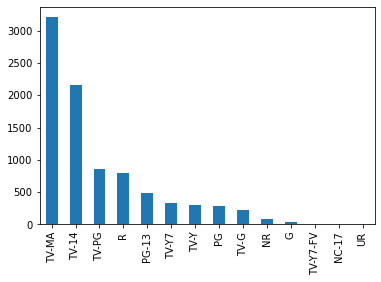

In [55]:
a.plot(kind='bar')

In [56]:
country_counts=df['country'].value_counts().sort_values(ascending=False)
country_counts.head(10)

United States     2815
India              972
Unknown            830
United Kingdom     419
Japan              244
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: country, dtype: int64

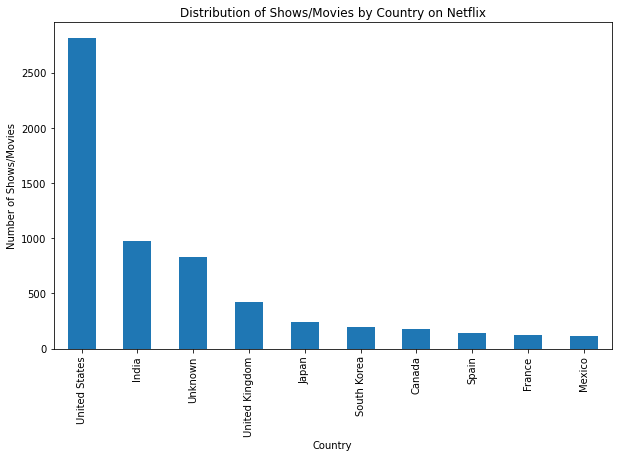

In [57]:
plt.figure(figsize=(10,6))
country_counts[:10].plot(kind='bar')
plt.title('Distribution of Shows/Movies by Country on Netflix')
plt.xlabel('Country')
plt.ylabel('Number of Shows/Movies')
plt.show()

In [58]:
type_count=df['type'].value_counts()
type_count

Movie      6126
TV Show    2674
Name: type, dtype: int64

<AxesSubplot:ylabel='type'>

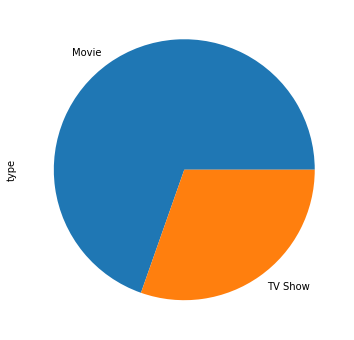

In [60]:
plt.figure(figsize=(10,6))
type_count.plot(kind='pie')


In [61]:
genre_count=df['listed_in'].str.split(',').explode().value_counts().sort_values(ascending=False)
genre_count.head(20)

 International Movies       2624
Dramas                      1599
Comedies                    1210
Action & Adventure           859
Documentaries                829
 Dramas                      827
International TV Shows       774
 Independent Movies          736
 TV Dramas                   696
 Romantic Movies             613
Children & Family Movies     605
 International TV Shows      576
 Thrillers                   512
 Comedies                    464
 TV Comedies                 460
Crime TV Shows               399
Kids' TV                     387
 Music & Musicals            357
 Romantic TV Shows           338
Stand-Up Comedy              334
Name: listed_in, dtype: int64

In [63]:
genre_count.shape

(73,)

<AxesSubplot:>

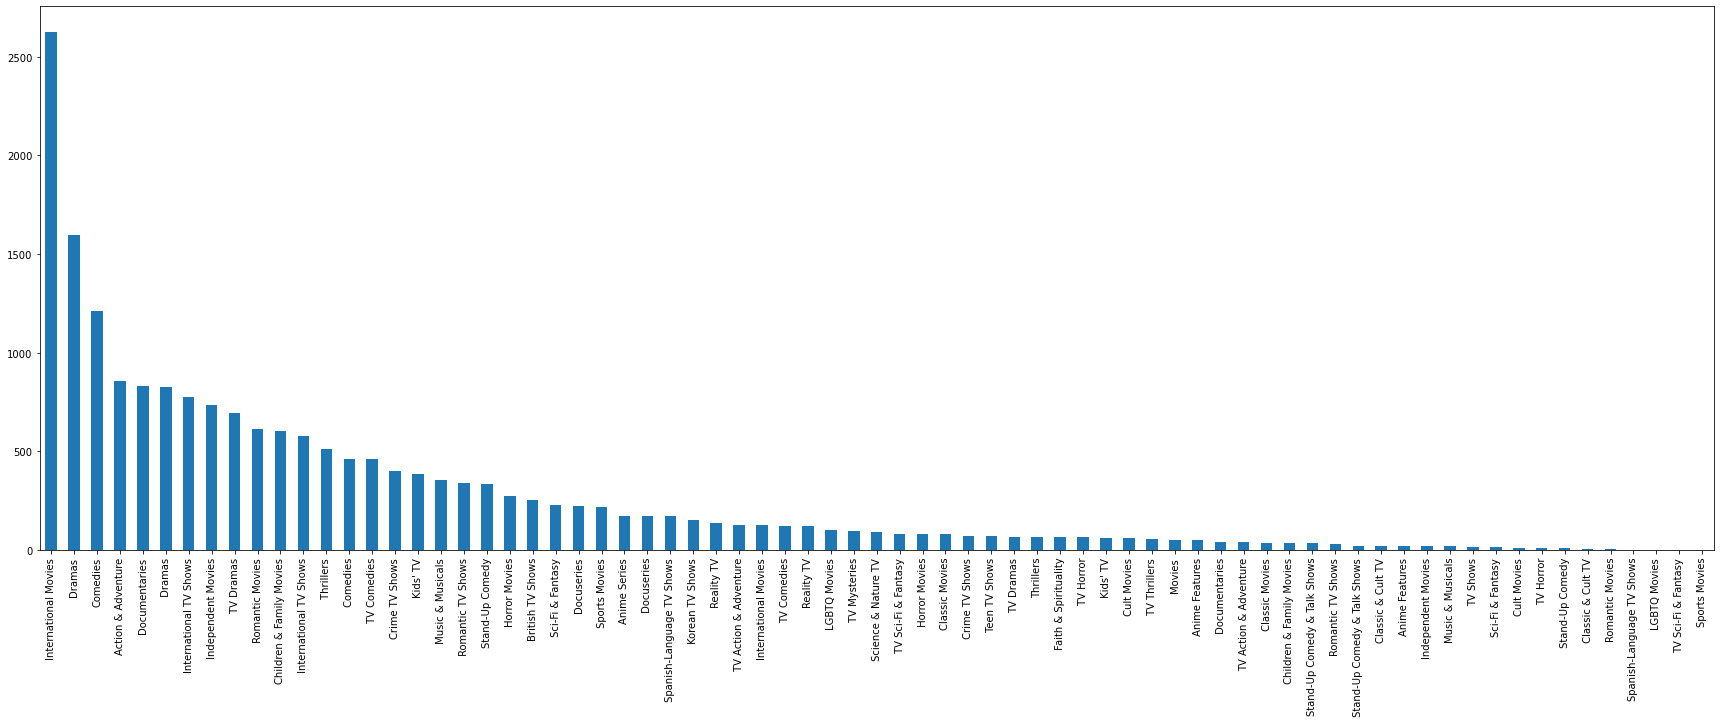

In [65]:
plt.figure(figsize=(30,10))
genre_count.plot(kind='bar')

In [66]:
df.describe()

,release_year
count,8800.000000
mean,2014.179886
std,8.822583
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


# Content Based Recommendation System

In [67]:
df['description'][0]

'As her father nears the end of his life, filmmaker Kirsten Johnson stages his death in inventive and comical ways to help them both face the inevitable.'

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv=TfidfVectorizer(min_df=6,max_features=None,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,3),stop_words='english')
df['description'].fillna('',inplace=True)

In [69]:
tvf_matrix=tfv.fit_transform(df['description'])

In [70]:
tvf_matrix.shape

(8800, 4657)

In [71]:
from sklearn.metrics.pairwise import sigmoid_kernel
sigma=sigmoid_kernel(tvf_matrix,tvf_matrix)

In [72]:
sigma[0]

array([0.76168432, 0.76159416, 0.76159416, ..., 0.76159416, 0.76159704,
       0.76159416])

In [73]:
indices = pd.Series(df.index, index=df['title']).drop_duplicates()

In [74]:
def get_recommendation(title,sigma=sigma):
    idx=indices[title]
    sigma_score=list(enumerate(sigma[idx]))
    sigma_score=sorted(sigma_score,key=lambda x:x[1],reverse=True)
    sigma_scores=sigma_score[1:11]
    movie_idx=[i[0] for i in sigma_scores]
    return df['title'].iloc[movie_idx]


In [75]:
get_recommendation('The Conjuring')

1648               Ghosts of War
8297    The Figurine (Araromire)
2123       Dérè: An African Tale
7584                 Night Moves
782                        Bliss
7871          Rise of the Zombie
1004          Izzy's Koala World
3402       Love, Surreal and Odd
6754         Final Destination 2
538                   The A List
Name: title, dtype: object

In [76]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [77]:
col=['title','director','cast','listed_in','description']
df_new=df[col]

In [78]:
def clean_data(x):
    return str.lower(x.replace(" ", ""))

In [79]:
col = ['title','director', 'cast', 'listed_in', 'description']
df_features = df[col]

In [80]:
df_features = df[col].copy()  

In [81]:
for feature in col:
    df_features[feature] = df_features[feature].apply(clean_data)
    
df_features.head()

,title,director,cast,listed_in,description
0,dickjohnsonisdead,kirstenjohnson,unknown,documentaries,"asherfathernearstheendofhislife,filmmakerkirst..."
1,blood&water,unknown,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille..."
3,jailbirdsneworleans,unknown,unknown,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein..."
4,kotafactory,unknown,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...","internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...


In [82]:
def all(x):
    return x['title']+' '+x['director']+' '+x['cast']+' '+x['listed_in']+' '+x['description']
    

In [83]:
df_features['all']=df_features.apply(all,axis=1)
df_features.head()

,title,director,cast,listed_in,description,all
0,dickjohnsonisdead,kirstenjohnson,unknown,documentaries,"asherfathernearstheendofhislife,filmmakerkirst...",dickjohnsonisdead kirstenjohnson unknown docum...
1,blood&water,unknown,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou...","blood&water unknown amaqamata,khosingema,gailm..."
2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille...","ganglands julienleclercq samibouajila,tracygot..."
3,jailbirdsneworleans,unknown,unknown,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein...",jailbirdsneworleans unknown unknown docuseries...
4,kotafactory,unknown,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...","internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...,"kotafactory unknown mayurmore,jitendrakumar,ra..."


In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df_features['all'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [85]:
df_features = df_features.reset_index()
indices = pd.Series(df_features.index, index = df_features['title'])

In [86]:
def get_recommendations2(title, cosine_sim = cosine_sim2):
    title = title.replace(' ', '').lower()
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse= True)
    
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]
    
    return df_features['title'].str.capitalize().iloc[movie_indices]

In [87]:
get_recommendations2('The Conjuring')

1118                               Insidious
1284                           Theconjuring2
3450                          Inthetallgrass
7163                                  Kanika
1898                              Thebinding
5110                                  Creep2
5736    Iamtheprettythingthatlivesinthehouse
5849                                    Hush
6204                             Backcountry
2036                                  #alive
Name: title, dtype: object

In [88]:
df_features

,index,title,director,cast,listed_in,description,all
0,0,dickjohnsonisdead,kirstenjohnson,unknown,documentaries,"asherfathernearstheendofhislife,filmmakerkirst...",dickjohnsonisdead kirstenjohnson unknown docum...
1,1,blood&water,unknown,"amaqamata,khosingema,gailmabalane,thabangmolab...","internationaltvshows,tvdramas,tvmysteries","aftercrossingpathsataparty,acapetownteensetsou...","blood&water unknown amaqamata,khosingema,gailm..."
2,2,ganglands,julienleclercq,"samibouajila,tracygotoas,samueljouy,nabihaakka...","crimetvshows,internationaltvshows,tvaction&adv...","toprotecthisfamilyfromapowerfuldruglord,skille...","ganglands julienleclercq samibouajila,tracygot..."
3,3,jailbirdsneworleans,unknown,unknown,"docuseries,realitytv","feuds,flirtationsandtoilettalkgodownamongthein...",jailbirdsneworleans unknown unknown docuseries...
4,4,kotafactory,unknown,"mayurmore,jitendrakumar,ranjanraj,alamkhan,ahs...","internationaltvshows,romantictvshows,tvcomedies",inacityofcoachingcentersknowntotrainindia’sfin...,"kotafactory unknown mayurmore,jitendrakumar,ra..."
...,...,...,...,...,...,...,...
8795,8802,zodiac,davidfincher,"markruffalo,jakegyllenhaal,robertdowneyjr.,ant...","cultmovies,dramas,thrillers","apoliticalcartoonist,acrimereporterandapairofc...","zodiac davidfincher markruffalo,jakegyllenhaal..."
8796,8803,zombiedumb,unknown,unknown,"kids'tv,koreantvshows,tvcomedies","whilelivingaloneinaspookytown,ayounggirlbefrie...","zombiedumb unknown unknown kids'tv,koreantvsho..."
8797,8804,zombieland,rubenfleischer,"jesseeisenberg,woodyharrelson,emmastone,abigai...","comedies,horrormovies","lookingtosurviveinaworldtakenoverbyzombies,ado...","zombieland rubenfleischer jesseeisenberg,woody..."
8798,8805,zoom,peterhewitt,"timallen,courteneycox,chevychase,katemara,ryan...","children&familymovies,comedies","draggedfromcivilianlife,aformersuperheromusttr...","zoom peterhewitt timallen,courteneycox,chevych..."


In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df_features['all'])

cosine_sim_tfidf = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [90]:
def get_recommendations3(title, cosine_sim = cosine_sim_tfidf):
    title = title.replace(' ', '').lower()
    idx = indices[title]
    
    sim_scores = list(enumerate(cosine_sim_tfidf[idx]))
    
    sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse= True)
    
    sim_scores = sim_scores[1:11]
    
    movie_indices = [i[0] for i in sim_scores]
    
    return df['title'].str.capitalize().iloc[movie_indices]

In [91]:
get_recommendations3('The Conjuring')

1284               The conjuring 2
1118                     Insidious
3450             In the tall grass
6939    Haunting on fraternity row
3398                           Eli
4868             The kissing booth
6042              A kind of murder
8272                  The departed
8395             The little prince
5440                  Shimmer lake
Name: title, dtype: object

In [95]:
get_recommendations3('Insidious')

1283          The conjuring
1284        The conjuring 2
1387    The next three days
3450      In the tall grass
3764            I am mother
8211         The black room
7220                Knowing
557              Winchester
6042       A kind of murder
8507             The signal
Name: title, dtype: object

In [102]:
tfidf_vectorizer = TfidfVectorizer(min_df=3,max_features=None,strip_accents='unicode',analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1,3),stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df_features['all'])


cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)



In [103]:
def get_recommendations4(title, cosine_sim_matrix, df_new):
    idx = df.index[df['title'] == title].tolist()[0]
    sim_scores = list(enumerate(cosine_sim_matrix[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return df['title'].iloc[movie_indices]


input_movie = 'The Conjuring'
recommendations = get_recommendations4(input_movie, cosine_sim, df)

print(f"Top 10 Recommendations for '{input_movie}':")
print(recommendations)

Top 10 Recommendations for 'The Conjuring':
1118              Insidious
1284        The Conjuring 2
3450      In the Tall Grass
6119     All Light Will End
6595             Desolation
6945         He's Out There
7704    Paranormal Activity
8276       The Devil Inside
8242      The Charnel House
8204           The Basement
Name: title, dtype: object
